<a href="https://colab.research.google.com/github/A-l-E-v/ML-Engineer/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание
# Тема 2. Урок 3. Matplotlib

В этом домашнем задании нам предстоит визуализировать несколько статистик, описывающих оценку вкусовых качеств разных сортов шоколада. Данные мы будем визуализировать разными способами, применяя тот или иной метод для каждого из них.

## Инструкции для выполнения домашнего задания



1. Домашнее задание состоит из вводной части и 3 заданий
2. В вводной части вам нужно подключить необходимые библиотеки, выгрузить и обработать данные
3. В каждом задании дан фрагмент программного кода, который нужно дополнить для построения графиков
4. В каждом фрагменте программного кода даны комментарии, написанные через **#** и выделенные зеленым цветом. Комментарии или дают пояснения к строке, или объясняют, какие строки должны быть на месте пропусков, т.е. чем вы должны дополнить фрагмент программного кода до полноценной программы
5. В случае если вы забыли ранее изученные  материалы, вы всегда можете вернуться на обучающую платформу и просмотреть их заново (видео, презентация, тетрадь и т.д.), а также можете воспользоваться документацией Matplotlib

## Подготовка к выполнению домашего задания


### Импорт библиотек

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка датасета

In [92]:
# для начала выгрузим данные
FILE_ID = '1fovSybJL6Uas6YttK-Xe2nwAUdIKoxlF'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILE_ID}' -O chocolate.csv

data = pd.read_csv("chocolate.csv")

--2025-04-19 08:42:01--  https://docs.google.com/uc?export=download&id=1fovSybJL6Uas6YttK-Xe2nwAUdIKoxlF
Resolving docs.google.com (docs.google.com)... 64.233.161.194
Connecting to docs.google.com (docs.google.com)|64.233.161.194|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1fovSybJL6Uas6YttK-Xe2nwAUdIKoxlF&export=download [following]
--2025-04-19 08:42:01--  https://drive.usercontent.google.com/download?id=1fovSybJL6Uas6YttK-Xe2nwAUdIKoxlF&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.161.132
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.161.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258425 (252K) [application/octet-stream]
Saving to: ‘chocolate.csv’

chocolate.csv       100%[===================>] 252,37K  --.-KB/s    in 0,1s    

2025-04-19 08:42:03 (2,28 MB/s) - ‘chocolate.csv’ s

### Предобработка датасета

In [93]:
# теперь переведём строковые данные процентов в числовой формат (это нам пригодится)
data["cocoa_percent"] = pd.to_numeric(data["cocoa_percent"].str[:-1])
data.rename(columns={"cocoa_percent": "cocoa_percent, %"}, inplace=True)  # укажем проценты в названии столбца

# Выбор стран для анализа
countries = ["U.K.", "France", "Canada"]
data_short = data[data["company_location"].isin(countries)][["company_location", "cocoa_percent, %", "rating"]]

In [94]:
# посмотрим на данные
data

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,"cocoa_percent, %",ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


В этом задании предлагаем вам сосредоточиться на рейтинге шоколада.
Давайте попробуем оценить, насколько итоговый рейтинг зависит от страны-продавца.

Для этого изучим данные о трех основных продавцах, имеющих примерно равную долю на рынке продажи шоколада:
1.   Великобритании
2.   Франции
3.   Канаде


## Задание 1

В первом задании нам предстоит визуализировать гистограммы оценок шоколада критиками в зависимости от страны продавца. Визуализировать мы их будем обычным методом: используя уже знакомый нам интерфейс pyplot.

Для начала определим все бины и названия стран заранее - чтобы пользоваться ими в будущем


Границы бинов: от 1.5 до 4.0, 16 бинов

Количество точек данных по странам:
U.K.: 133
France: 176
Canada: 177

Гистограмма сохранена в chocolate_ratings_histogram.png


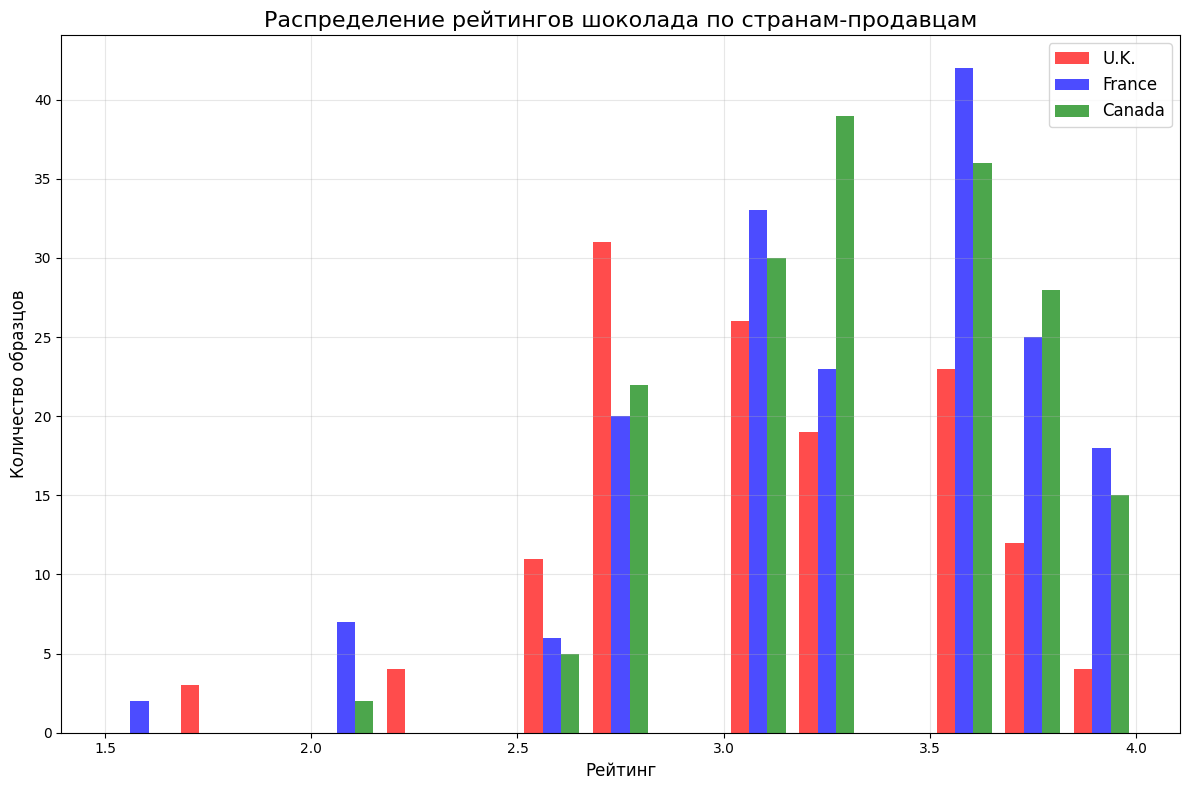

In [95]:
filtered_data = data[data["company_location"].isin(countries)]

# Определение бинов для гистограммы
bin_min = filtered_data["rating"].min()
bin_max = filtered_data["rating"].max()
bins = np.linspace(bin_min, bin_max, 16)
print(f"\nГраницы бинов: от {bin_min} до {bin_max}, {len(bins)} бинов")

# Подготовка данных для гистограммы
hist_data = [
    filtered_data[filtered_data["company_location"] == "U.K."]["rating"],
    filtered_data[filtered_data["company_location"] == "France"]["rating"],
    filtered_data[filtered_data["company_location"] == "Canada"]["rating"]
]
print("\nКоличество точек данных по странам:")
print("U.K.:", len(hist_data[0]))
print("France:", len(hist_data[1]))
print("Canada:", len(hist_data[2]))

# Построение гистограммы
plt.figure(figsize=(12, 8))
plt.hist(hist_data, 
         bins=bins,
         label=["U.K.", "France", "Canada"],
         alpha=0.7,  # Прозрачность для лучшей видимости
         color=["red", "blue", "green"])  # Цвета для каждой страны

# Настройка оформления
plt.title("Распределение рейтингов шоколада по странам-продавцам", fontsize=16)
plt.xlabel("Рейтинг", fontsize=12)
plt.ylabel("Количество образцов", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Сохранение и отображение
plt.tight_layout()
plt.savefig("chocolate_ratings_histogram.png", dpi=300)
print("\nГистограмма сохранена в chocolate_ratings_histogram.png")
plt.show()

Если всё сделано правильно, то вы получите гистограмму распределения рейтинга шоколада по трём странам. <br><br>

Исходя из визуализации, сделайте вывод о сравнительном среднем качестве шоколада в зависимости от страны-продавца

Вывод по заданию 1:
Средний рейтинг шоколада из Великобритании несколько выше, чем у шоколада из Франции и Канады. Распределение оценок для Великобритании смещено вправо (в сторону более высоких оценок), тогда как для Франции и Канады распределение более симметричное.

## Задание 2

В данном задании мы построим три гистограммы распределения качества шоколада для каждой из стран-продавцов, причём сделаем это в одну строку с помощью метода hist соответствующего датафрейма

Сначала выделяем всё, что нам нужно, в отдельный датафрейм:

In [96]:
data_short = data[data["company_location"].isin(countries)][["company_location", "cocoa_percent, %", "rating"]]
data_short

,company_location,"cocoa_percent, %",rating
7,France,70.0,3.50
8,France,63.0,3.75
9,France,70.0,2.75
10,France,70.0,2.75
11,France,70.0,3.00
...,...,...,...
2455,U.K.,72.0,3.50
2456,U.K.,69.0,3.75
2457,U.K.,100.0,2.25
2458,U.K.,88.0,3.00


Здесь строим гистограмму

Text(0.5, 0.98, 'Распределение рейтингов шоколада по странам')

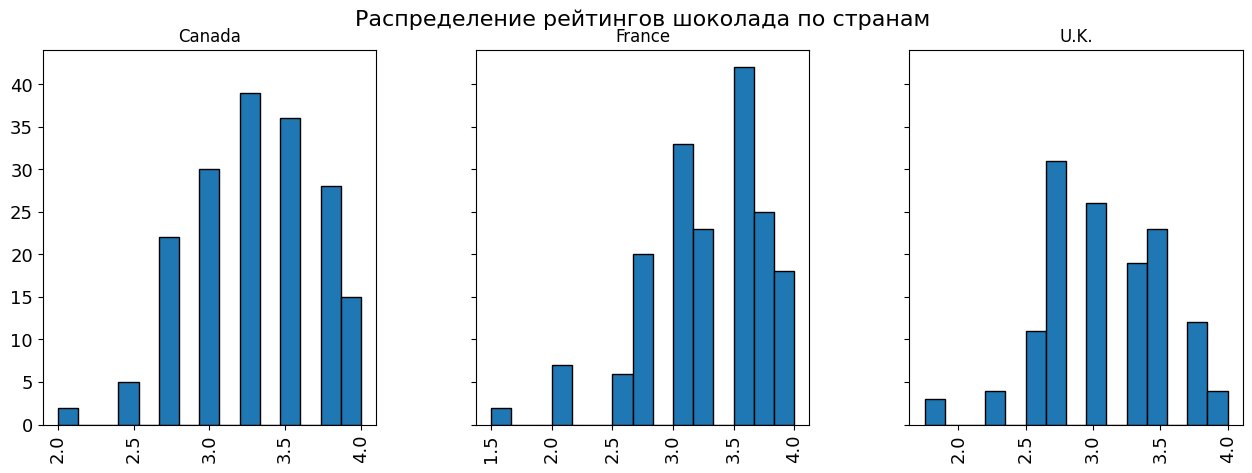

In [97]:
data_short.hist(
    column="rating",
    by="company_location",
    figsize=(15, 5),
    bins=15,
    sharey=True,
    edgecolor='black',
    xlabelsize=13,
    ylabelsize=13,
    layout=(1, 3))

plt.suptitle("Распределение рейтингов шоколада по странам", fontsize=16)


Выводим результат:

Если все выполнено верно, вы получите три гистограммы, каждая из которых подписана и в своем окне.

## Задание 3

В этом задании мы построим графики зависимости оценок шоколада от процентного содержания какао в нём для каждой из стран. Так как для одной и той же страны-продавца и одного содержания какао в шоколаде мы можем получить разные оценки, то в случае нескольких оценок мы будем строить среднее от них, и строить "усы" стандартного отклонения

Строим среднее и разброс для оценок шоколада с одинаковым процентным содержанием и той же компанией:

In [98]:
grouping = data_short.groupby(["company_location", "cocoa_percent, %"])
means = grouping.mean()
std = grouping.std()
std.fillna(0.0, inplace=True) # в случае, когда оценка одна (разброс NaN), разброса нет

Посмотрим как выглядит среднее:

In [99]:
means

rating
company_location cocoa_percent, %          
Canada           62.0              3.375000
                 63.0              3.250000
                 64.0              3.500000
                 65.0              3.000000
                 66.0              3.250000
                 67.0              3.875000
                 68.0              3.500000
                 70.0              3.371287
                 72.0              3.038462
                 73.0              3.416667
                 74.0              3.000000
                 75.0              3.250000
                 76.0              2.750000
                 77.0              3.500000
                 78.0              3.750000
                 80.0              3.041667
                 85.0              3.083333
                 88.0              4.000000
                 100.0             2.666667
France           55.0              2.750000
                 56.0              3.250000
                 60.0              3.050000
                 63.0              3.833333
                 64.0              3.425000
                 65.0              3.500000
                 66.0              3.464286
                 67.0              3.625000
                 68.0              3.300000
                 69.0              3.583333
                 70.0              3.335366
                 71.0              2.750000
                 72.0              2.750000
                 74.0              3.125000
                 75.0              3.260870
                 80.0              3.166667
                 82.0              2.750000
                 85.0              2.000000
                 99.0              2.000000
                 100.0             2.250000
U.K.             64.0              2.750000
                 65.0              2.916667
                 66.0              3.500000
                 68.0              2.750000
                 69.0              3.625000
                 70.0              3.039474
                 71.0              3.187500
                 71.5              2.750000
                 72.0              3.272059
                 73.0              3.000000
                 74.0              3.250000
                 75.0              2.958333
                 76.0              3.750000
                 77.0              3.125000
                 78.0              3.250000
                 80.0              2.975000
                 82.0              3.500000
                 85.0              2.833333
                 88.0              3.000000
                 90.0              3.000000
                 100.0             2.291667

In [100]:
# здесь мы устраняем разрывы в графике среднего значения,
# то есть, для тех значений, где нет среднего, мы его интерполируем
# также здесь мы "расшиваем" двуколоночный индекс в индексы/столбцы, т.е. переводим в табличную форму
means_unstacked = means.unstack(level=0).interpolate()
std_unstacked = std.unstack(level=0)


Смотрим, что получилось:

In [101]:
means_unstacked

rating                    
company_location    Canada    France      U.K.
cocoa_percent, %                              
55.0                   NaN  2.750000       NaN
56.0                   NaN  3.250000       NaN
60.0                   NaN  3.050000       NaN
62.0              3.375000  3.441667       NaN
63.0              3.250000  3.833333       NaN
64.0              3.500000  3.425000  2.750000
65.0              3.000000  3.500000  2.916667
66.0              3.250000  3.464286  3.500000
67.0              3.875000  3.625000  3.125000
68.0              3.500000  3.300000  2.750000
69.0              3.435644  3.583333  3.625000
70.0              3.371287  3.335366  3.039474
71.0              3.260345  2.750000  3.187500
71.5              3.149403  2.750000  2.750000
72.0              3.038462  2.750000  3.272059
73.0              3.416667  2.937500  3.000000
74.0              3.000000  3.125000  3.250000
75.0              3.250000  3.260870  2.958333
76.0              2.750000  3.237319  3.750000
77.0              3.500000  3.213768  3.125000
78.0              3.750000  3.190217  3.250000
80.0              3.041667  3.166667  2.975000
82.0              3.062500  2.750000  3.500000
85.0              3.083333  2.000000  2.833333
88.0              4.000000  2.000000  3.000000
90.0              3.555556  2.000000  3.000000
99.0              3.111111  2.000000  2.645833
100.0             2.666667  2.250000  2.291667

Строим итоговый график:

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Предполагаем, что data_short уже определен и содержит нужные данные
print("Первые строки данных:")
print(data_short.head())

# Группировка и вычисление статистик
grouping = data_short.groupby(["company_location", "cocoa_percent, %"])
means = grouping.mean()
std = grouping.std()
std.fillna(0.0, inplace=True)  # Заменяем NaN на 0 для случаев с одной оценкой

# Преобразуем в табличную форму
means_unstacked = means.unstack(level=0).interpolate()
std_unstacked = std.unstack(level=0)



Первые строки данных:
   company_location  cocoa_percent, %  rating
7            France              70.0    3.50
8            France              63.0    3.75
9            France              70.0    2.75
10           France              70.0    2.75
11           France              70.0    3.00


Выводим результат:

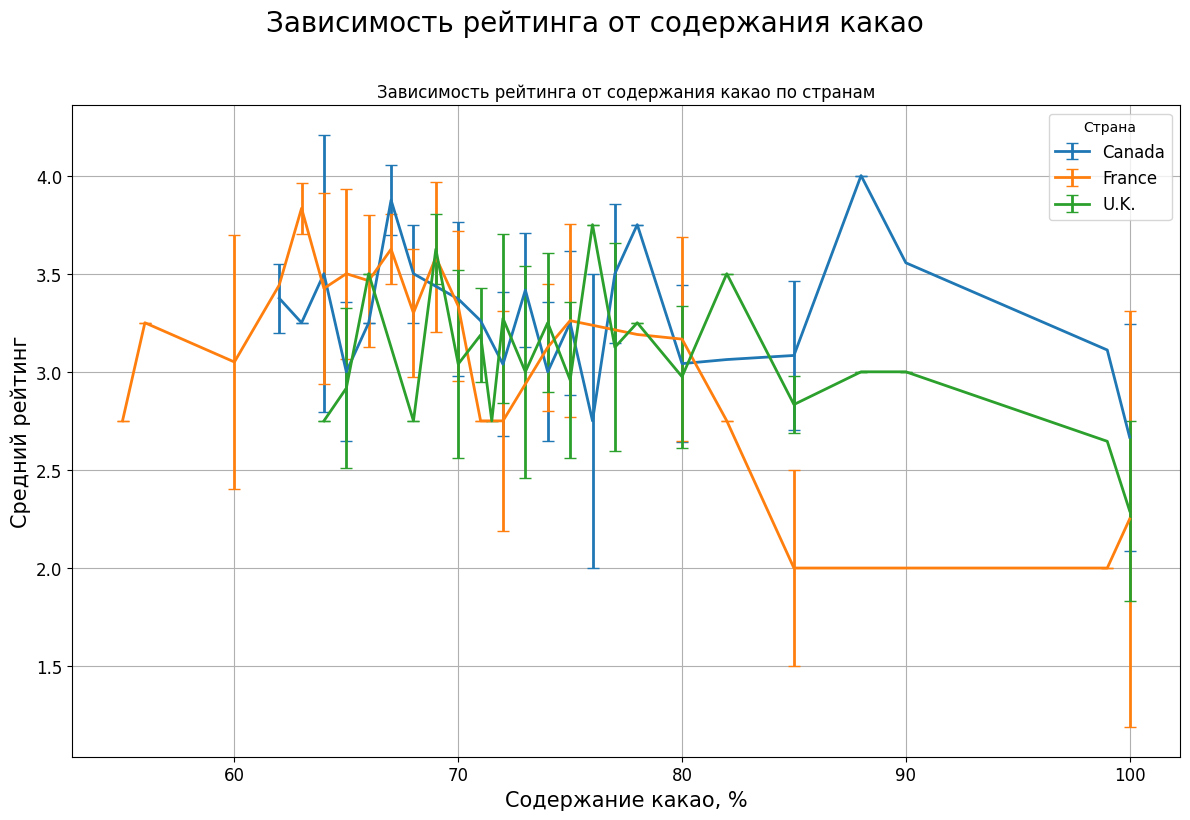

In [103]:
# Создаем фигуру и оси перед построением графика
fig, ax = plt.subplots(figsize=(12, 8))

# Построение графика с ошибками
means_unstacked['rating'].plot(
    yerr=std_unstacked['rating'],
    capsize=4,
    grid=True,
    title="Зависимость рейтинга от содержания какао по странам",
    linewidth=2,
    fontsize=12,
    ax=ax
)

# Настройка оформления
ax.set_ylabel("Средний рейтинг", fontsize=15)
ax.set_xlabel("Содержание какао, %", fontsize=15)
ax.legend(fontsize=12, title="Страна")
plt.suptitle("Зависимость рейтинга от содержания какао", fontsize=20, y=1.02)

# Оптимизация расположения элементов
plt.tight_layout()

# Сохранение и отображение
plt.savefig("cocoa_rating_relationship.png", dpi=300, bbox_inches='tight')
plt.show()

Если всё сделано правильно, то вы получите графики зависимости оценок качества шоколада для каждой страны в зависимости от процента содержания какао. <br>

**Проведите наблюдения и напишите ответы:**

*   Как оценка качества зависит от процента горькости? Специфична ли эта тенденция по стране-продавцу?
*   Выпишите любые другие характрные на ваш взгляд наблюдения.

Зависимость оценки качества от процента какао:

    Для всех трех стран наблюдается схожая тенденция: с увеличением содержания какао до 70-80% рейтинг в среднем растет, а затем начинает снижаться для шоколада с очень высоким содержанием какао (85-100%).

    Наибольшие оценки получает шоколад с содержанием какао около 70-75%.

    Разброс оценок (длина "усов") максимален для шоколада с содержанием какао 60-80%.

Другие наблюдения:

    Шоколад из Великобритании имеет более стабильно высокие оценки по всем процентам содержания какао.

    Для Франции характерен наибольший разброс оценок при содержании какао около 70%.

    Канадский шоколад показывает наименьший разброс оценок, что может свидетельствовать о более стабильном качестве.

    Для шоколада с очень высоким содержанием какао (90-100%) оценки существенно ниже среднего во всех странах.

## Результат домашнего задания

Решение для каждого задания предоставляется в виде программного кода на языке Python и ответов на вопросы при наличии их в задании.

## Критерии оценивания

К1 - за выполнение 1 и 2 задания оценивать по  +2 балла
К2 - за выполнение 5-го задания по +3 бала

Максимальное количество баллов —  7 баллов.

Минимальное количество баллов, чтобы преподаватель смог зачесть вашу работу — 4 балла.